# Info 6010 Ex6
** Due last day of classes Tue 12 May 2020 23:59:59 (would be useful to finish #1 before next class on Fri 8 May)**

Rather than working from this notebook, it's best if you start a new notebook. The first cell should be a markdown cell containing your name (use the menu button 2nd from right above to change from code to markdown).<br>
Then you should transfer only the cells you need into the new notebook, so they're not lost in the explanatory text below.

Upload to: [upload site](https://pgcourse.infosci.cornell.edu/cgi-bin/probset.py)

## 0)
The first problem is to specify a "mini-project due" at the end of the semester (that would mean Mon 25 May, as determined by the revised final exam schedule). As mentioned in lecture, it should involve finding some data of interest (either related to your research, or some form of proxy for data you've fantasized about, or not  -- some in the past have involved wine, food, music, games), and should include posing some questions to investigate, some data analysis using methods from this class, visualization of the results, and some form of narrative based on the results. The format for the project can be either written form (annotated ipynb, pdf) or a brief (private or semi-public) presentation.

[If the data you'd really like to analyze at some point is unavailable, we can discuss in office hour or via email what might provide a good substitute to help you get up to speed if it does become available.]

While the last day of finals is 23 May, the deadline for faculty is not until sometime in June, so there will remain some flexibility for anyone with extenuating circumstances.

In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

## 1) 

In class lec12 (1 May), I used an interactive demo to produce the spiral data below. (I wasn't originally intending to use it for this purpose, but saved the coordinates as plotted, so the below is the actual imperfect spiral data produced under duress, in real time ...):

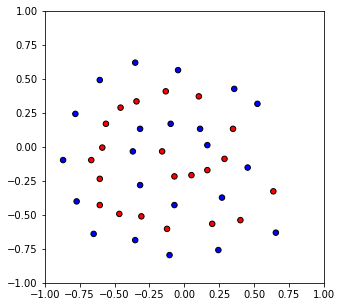

In [3]:
plt.figure(figsize=(5,5))
plt.axis([-1,1,-1,1])
plt.scatter(*X_train.T, c=np.array(['b','r'])[y_train], ec='k', s=30);

In [2]:
#these are the coordinates saved from the 1 May class demo, load in to plot the above
X_train = np.array([[0.165, 0.013], [0.113, 0.133], [-0.098, 0.17], [-0.317, 0.133],
    [-0.369, -0.033], [-0.317, -0.281], [-0.071, -0.428], [0.27, -0.373], [0.454, -0.152],
    [0.524, 0.317], [0.358, 0.427], [-0.045, 0.565], [-0.352, 0.62], [-0.606, 0.492],
    [-0.869, -0.097], [-0.781, 0.243], [-0.772, -0.401], [-0.65, -0.64], [-0.352, -0.686],
    [-0.106, -0.796], [0.244, -0.759], [0.656, -0.631], [-0.159, -0.033], [-0.071, -0.217],
    [0.165, -0.171], [0.051, -0.208], [0.288, -0.088], [0.349, 0.133], [0.104, 0.372],
    [-0.133, 0.409], [-0.343, 0.335], [-0.457, 0.289], [-0.562, 0.17], [-0.588, -0.005],
    [-0.606, -0.235], [-0.606, -0.428], [-0.466, -0.493], [-0.308, -0.511], [-0.124, -0.603],
    [0.2, -0.566], [0.402, -0.539], [0.638, -0.327], [-0.667, -0.097]])
y_train=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

A decision tree trained on this data gives decision boundaries not all that spirally:

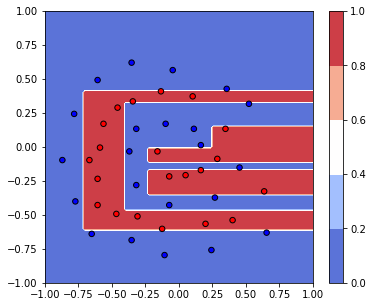

In [4]:
plt.figure(figsize=(6,5))
...
plt.colorbar()

The question posed in class was whether the overfitting above could be mitigated by bagging, to better infer the spiral intent. The plot below shows 14 bootstrap samples taken from the above data (43 data points selected at random, with replacement), each with its fitted decision tree.  None of them individually show any particularly spiral character, but their average, in the 15th fig below, does start to capture the original intent with just 14 bootstrap samples. The final plot shows the result of averaging over 10,000 bootstrap samples.

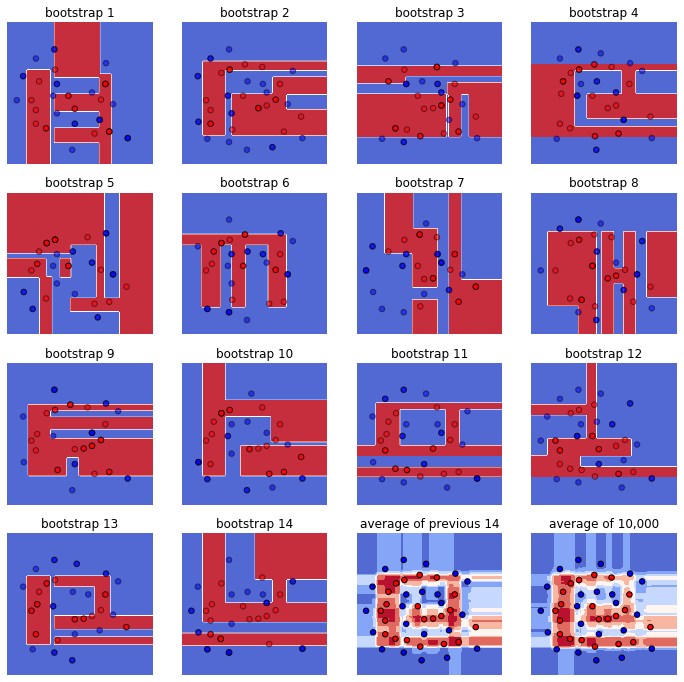

In [5]:
plt.figure(figsize=(12,12))
for i in range(1,15):    
    plt.subplot(4,4,i)
    plt.title('bootstrap {}'.format(i))
    plt.axis([-1,1,-1,1])
    plt.axis('off')
    ...
    
plt.subplot(4,4,15)
...

plt.subplot(4,4,16)
...

The problem is to use `sklearn.tree.DecisionTreeClassifier()`
as in [lec12-dtree.ipynb](https://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/spr20/lec12-dtree.ipynb)
to reproduce the plots above.

(It would make sense to use the `my_coolwarm` colormap defined in that notebook, so that p=.5 becomes white not gray)

There are a number of interesting datasets at the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets.php)
(might also provide ideas for mini-project).

## 2)

Consider the credit card default dataset available as [UCI default of credit card clients.xls](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
(or the same data from kaggle as [UCI_Credit_Card.csv](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/data)).

This provides a classification problem to predicts whether a credit card holder will default on his or her debt.
There are a total of 30,000 observations, 23 features, and 1 label to predict.<br>
(Note that the first column, called `ID`, is just a numerical index and should not be used as a feature in the classifier.)

The label to predict is a binary variable that encodes whether the card holder will default on his/her debt, with 0 encoding "no default" and 1 encoding "default".

10 of the 22 explanatory variables are categorical variables containing
information such as gender, education, marital status, and whether past payments have been made on time or delayed.<br>
The remaining 13 continuous explanatory variables contain information on the monthly bill amount and payment amount over six months. Here is the explanation from the above urls:

<blockquote>
Attribute Information:

The binary variable, default payment (Yes = 1, No = 0) is the response variable, 
and the following 23 variables as explanatory features:<br>

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>

X2: Gender (1 = male; 2 = female).<br>

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>

X4: Marital status (1 = married; 2 = single; 3 = others).<br>

X5: Age (year).<br>

X6 - X11: History of past payment<br>
The past monthly payment records (from April to September, 2005) were trackes as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.<br>
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months, and above.<br>

X12-X17: Amount of bill statement (NT dollar).<br>
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.<br>

X18-X23: Amount of previous payment (NT dollar).<br>
X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005.
</blockquote>


**A.** i) Train a [RandomForestClassifier(criterion='entropy')](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the label for payment default.
You can either use `train_test_split(..., .5)` to randomly select half the data as the training set and half as the test set (there's plenty of data, so no need to select a small test set), or use `cross_val_score()` to do a five fold cross-validation. Experiment with the parameters `n_estimators` (the number of trees in the forest) and `max_features` (the number of features to use at each node split) to find the best values. You should be able to achieve greater than 80% accuracy on the test set.

ii) What are the five most important predictors of default?

iii) To get some intuition for the importance of the features, consider the `LIMIT_BAL` (the monthly spending limit on the account). The plot below shows a histogram of the values of this feature in the dataset. Plot instead two histograms (on the same plot), one for the `LIMIT_BAL`s associated to `default=0`, and the other for the `LIMIT_BAL`s associated to `default=1`. If they look roughly the same, then it's not a discriminating feature, but if they look different, with one above the other in some range, then you can determine which range of values is more likely to predict default. (That would provide a form of narrative for the data. Note that your histograms in this case should use `density=True`, since they involve different amounts of data and can't otherwise be easily compared.)

**B.** Train a [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier on the same data, and compare its performance to the `RandomForestClassifier()`.

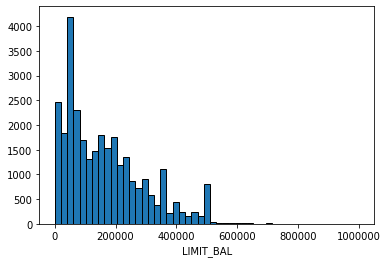

In [1]:
...
plt.hist(df_credit['LIMIT_BAL'], bins=np.linspace(0,1000000,50), ec='k')
plt.xlabel('LIMIT_BAL');

## 3)

I considered three additional problems (the first of which I'd promised as bonus at the end of Ex5 but ran out of time), but decided that would make this too long.

If anyone is interested, I can post as bonus or cultural enlightenment ... let me know.

I. The first is based on the slides
[lec10_netflix.pdf](https://www.cs.cornell.edu/~ginsparg/6010/spr20/lec10_netflix.pdf)
and notebook
[lec10_grad_desc_factorization.ipynb](https://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/spr20/lec10_grad_desc_factorization.ipynb)
which I didn't quite complete, but might have a chance during lec13. It involves making recommendations on a subset of the
[netflix prize data](https://www.kaggle.com/netflix-inc/netflix-prize-data])

II. The second example is similar to #2) above, but is a regression problem that predicts log-scaled number of shares of online news articles.<br> The data is available from UCI as [OnlineNewsPopularity.csv](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) -- 39,644 observations, 58 features, and 1 response variable.
It uses [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), which works similarly to `RandomForestClassifier()`, except instead of splitting to maximize the class impurity in the descendant nodes, the object is to find a split that minimizes the variances of the data in the descendant nodes.

III. The third uses financial data from 2018 to show how near-term future volatility can be predicted from financial time series data using a random forest classifier (this is one of the methods used by automated financial trading firms traders to tune both what they sell and purchase, and how quickly the transactions are made, to maximize revenues).